Part I: Explaratory Data Analysis of CSV Files


=== Analysis for Customers Dataset ===

Summary Statistics:
                            join_date          last_purchase_date  \
count                           10000                       10000   
unique                            NaN                         NaN   
top                               NaN                         NaN   
freq                              NaN                         NaN   
mean    2022-03-19 09:28:13.439999744  2023-04-25 18:26:12.480000   
min               2020-01-01 00:00:00         2020-01-26 00:00:00   
25%               2021-02-15 00:00:00         2022-09-19 00:00:00   
50%               2022-03-19 00:00:00         2023-08-04 00:00:00   
75%               2023-04-28 00:00:00         2024-02-11 00:00:00   
max               2024-05-31 00:00:00         2024-05-31 00:00:00   
std                               NaN                         NaN   

                age gender    location  
count   8991.000000   9467       10000  
unique          NaN      2  

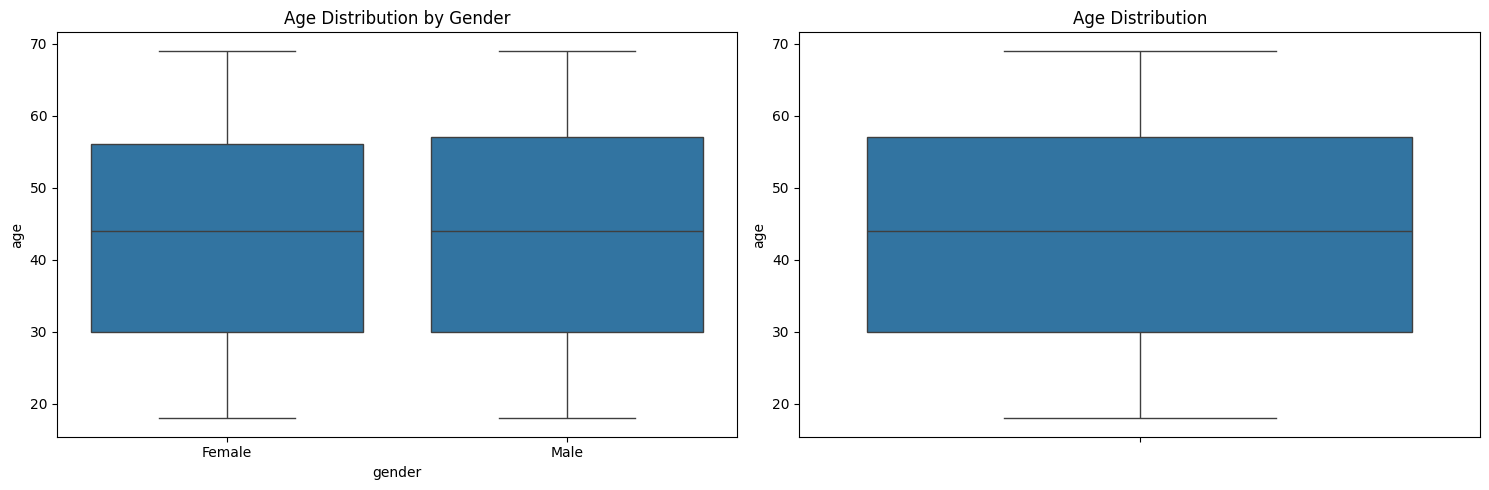

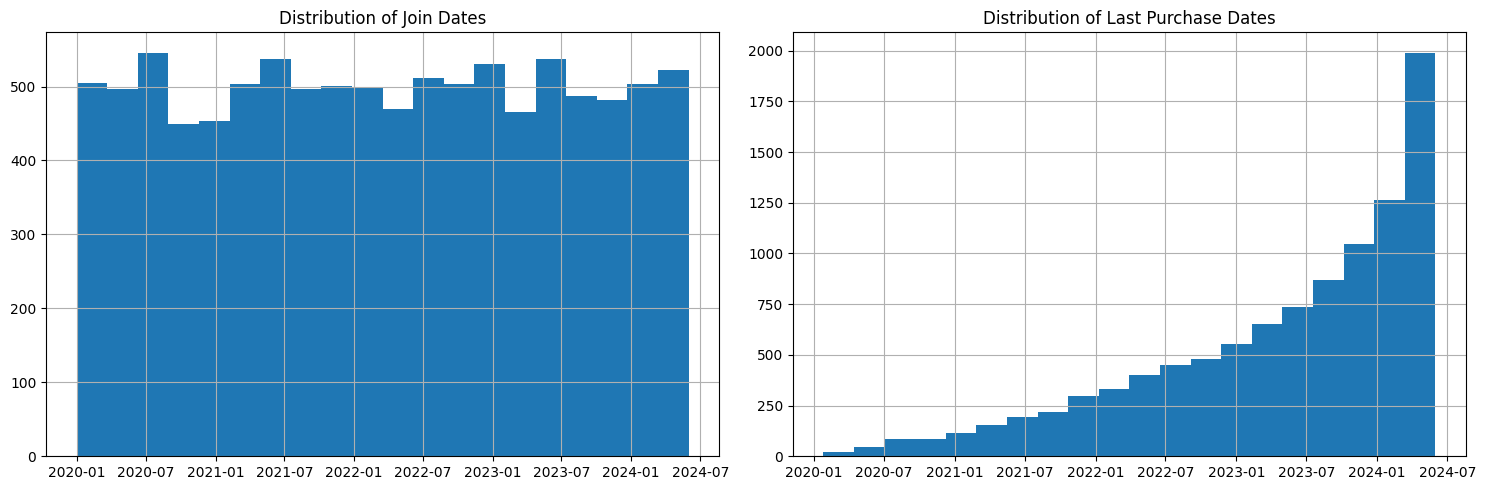


Null Values:
customer_id              0
join_date                0
last_purchase_date       0
age                   1009
gender                 533
location                 0
dtype: int64

=== Analysis for Transactions Dataset ===



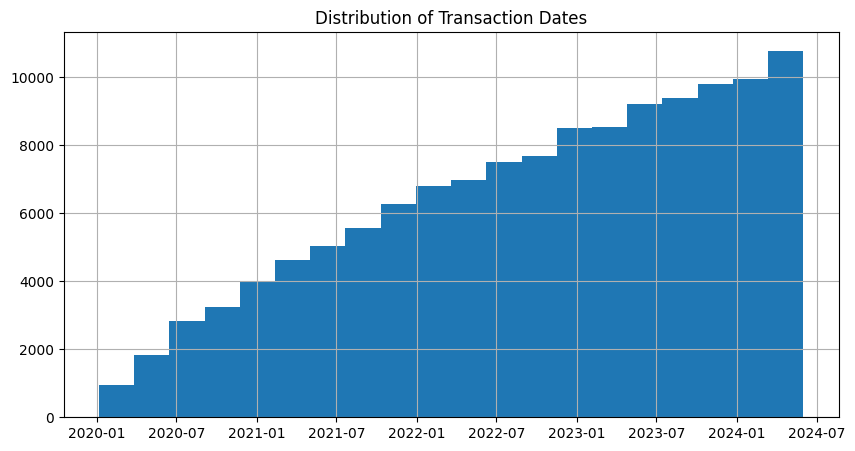

Summary Statistics:
        transaction_amount product_category
count        129545.000000           129545
unique                 NaN                3
top                    NaN      Electronics
freq                   NaN            43460
mean            597.287659              NaN
std             491.564174              NaN
min              10.020000              NaN
25%             228.320000              NaN
50%             438.380000              NaN
75%             846.980000              NaN
max            1999.990000              NaN

95th Percentile of Transaction Amount: 1707.46


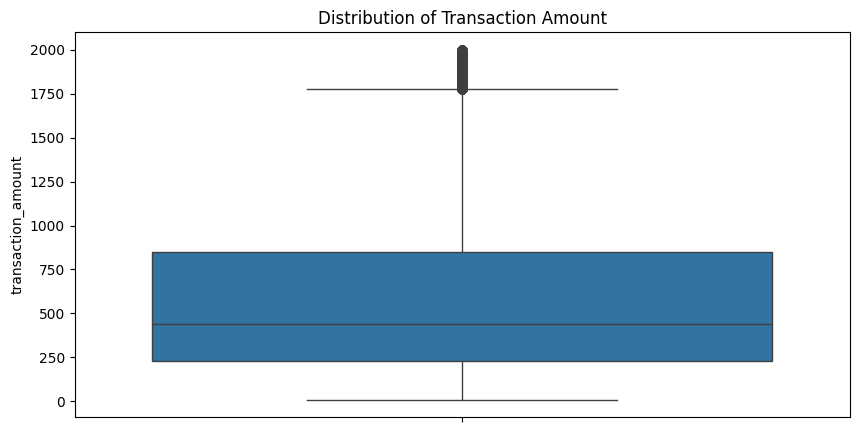

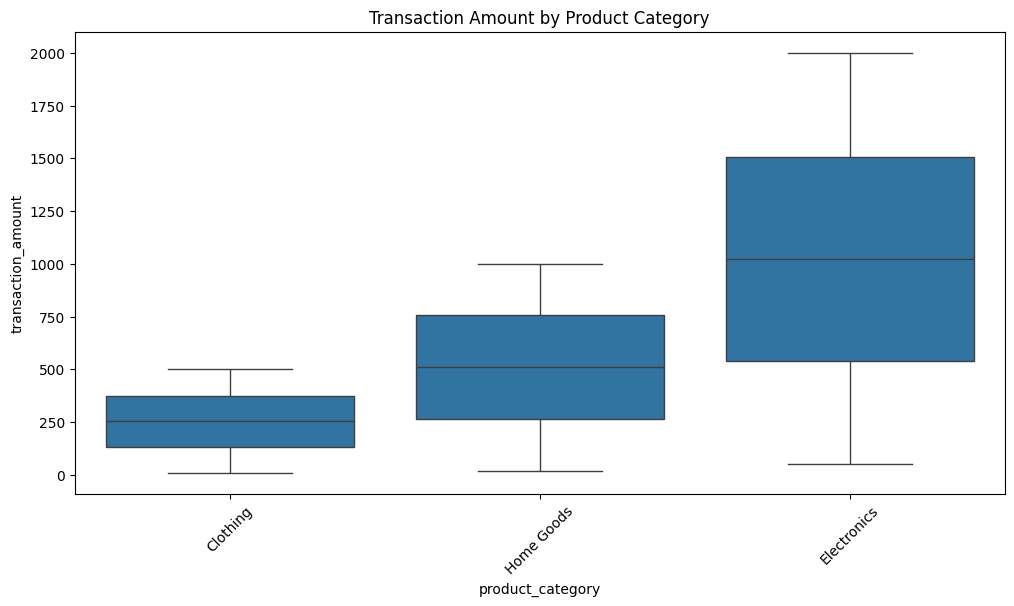


Null Values:
transaction_id        0
customer_id           0
transaction_date      0
transaction_amount    0
product_category      0
dtype: int64

=== Analysis for Engagements Dataset ===

Summary Statistics:
       number_of_site_visits  number_of_emails_opened  number_of_clicks
count           10000.000000             10000.000000      10000.000000
mean              100.111900                39.862100         19.725300
std               118.625052                46.511719         22.975083
min                 1.000000                 1.000000          1.000000
25%                15.000000                 6.000000          3.000000
50%                53.000000                22.000000         11.000000
75%               141.000000                57.000000         28.000000
max               711.000000               303.000000        142.000000

95th Percentiles:
number_of_site_visits: 363.00
number_of_emails_opened: 139.00
number_of_clicks: 69.05


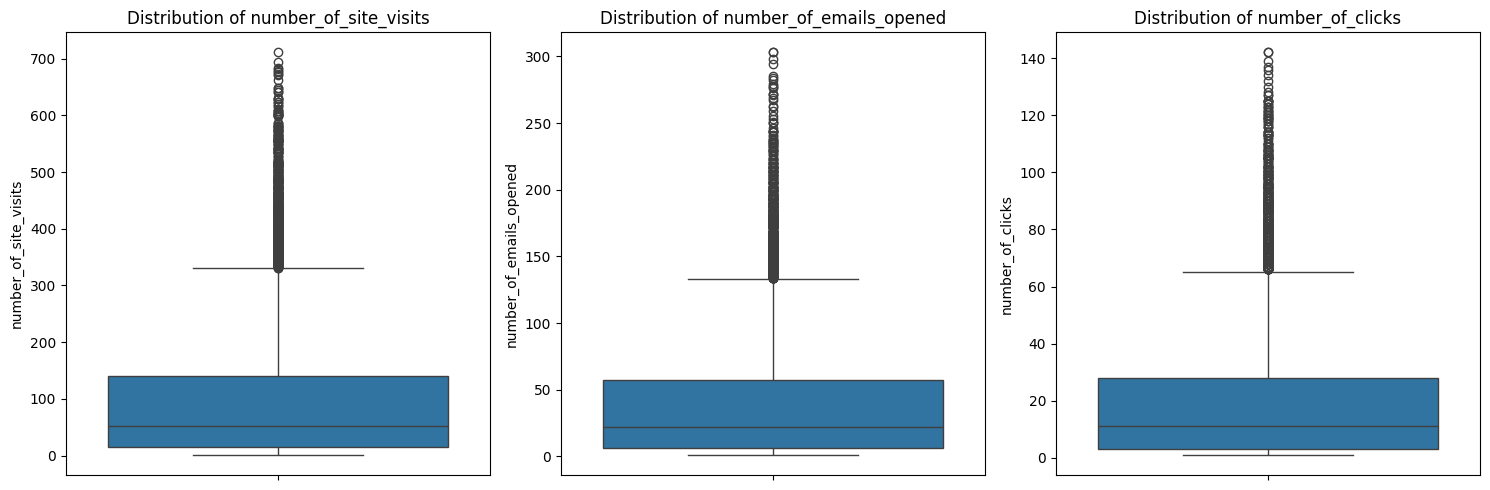


Null Values:
customer_id                0
number_of_site_visits      0
number_of_emails_opened    0
number_of_clicks           0
dtype: int64

=== Analysis for Marketing Dataset ===

Summary Statistics:
       response promotion_type                  campaign_date
count     25200          25200                          25200
unique        2              3                            NaN
top          No       Discount                            NaN
freq      12622           8430                            NaN
mean        NaN            NaN  2022-10-07 03:32:06.857142784
min         NaN            NaN            2020-01-06 00:00:00
25%         NaN            NaN            2021-12-12 00:00:00
50%         NaN            NaN            2022-12-01 00:00:00
75%         NaN            NaN            2023-09-15 00:00:00
max         NaN            NaN            2024-05-31 00:00:00


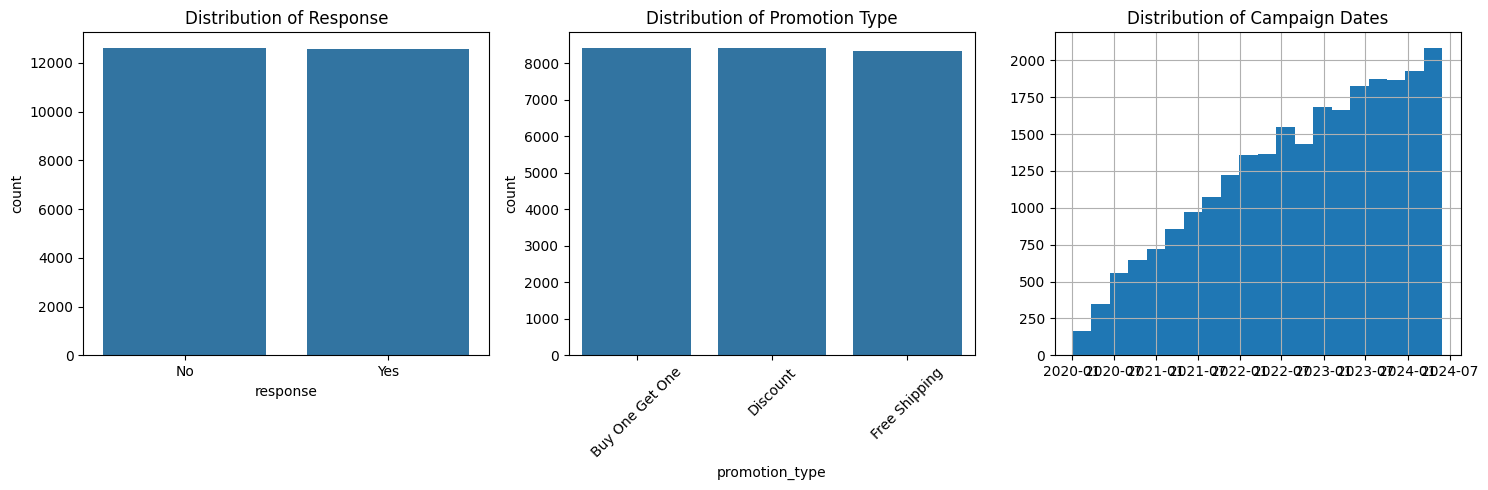


Null Values:
campaign_id       0
customer_id       0
response          0
promotion_type    0
campaign_date     0
dtype: int64


In [58]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def analyze_customers(url):
    print("\n=== Analysis for Customers Dataset ===\n")
    df = pd.read_csv(url)
    
    # Convert date columns to datetime
    df['join_date'] = pd.to_datetime(df['join_date'])
    df['last_purchase_date'] = pd.to_datetime(df['last_purchase_date'])
    
    # Summary stats for specified columns
    print("Summary Statistics:")
    print(df[['join_date', 'last_purchase_date', 'age', 'gender', 'location']].describe(include='all'))
    
    # Boxplots for age and gender
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))
    sns.boxplot(x='gender', y='age', data=df, ax=ax1)
    ax1.set_title('Age Distribution by Gender')
    sns.boxplot(y='age', data=df, ax=ax2)
    ax2.set_title('Age Distribution')
    plt.tight_layout()
    plt.show()
    
    # Distribution of date columns
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))
    df['join_date'].hist(ax=ax1, bins=20)
    ax1.set_title('Distribution of Join Dates')
    df['last_purchase_date'].hist(ax=ax2, bins=20)
    ax2.set_title('Distribution of Last Purchase Dates')
    plt.tight_layout()
    plt.show()
    
    # Check for nulls
    print("\nNull Values:")
    print(df.isnull().sum())

def analyze_transactions(url):
    print("\n=== Analysis for Transactions Dataset ===\n")
    df = pd.read_csv(url)
    df['transaction_date'] = pd.to_datetime(df['transaction_date'])
    
    # Distribution of transaction date
    plt.figure(figsize=(10, 5))
    df['transaction_date'].hist(bins=20)
    plt.title('Distribution of Transaction Dates')
    plt.show()
    
    # Summary stats for transaction amount and product category
    print("Summary Statistics:")
    print(df[['transaction_amount', 'product_category']].describe(include='all'))
    
    # 95th percentile for transaction amount
    print(f"\n95th Percentile of Transaction Amount: {df['transaction_amount'].quantile(0.95):.2f}")
    
    # Boxplot of transaction amount
    plt.figure(figsize=(10, 5))
    sns.boxplot(y='transaction_amount', data=df)
    plt.title('Distribution of Transaction Amount')
    plt.show()
    
    # Distribution of transaction amount by product category
    plt.figure(figsize=(12, 6))
    sns.boxplot(x='product_category', y='transaction_amount', data=df)
    plt.title('Transaction Amount by Product Category')
    plt.xticks(rotation=45)
    plt.show()
    
    # Check for nulls
    print("\nNull Values:")
    print(df.isnull().sum())

def analyze_engagements(url):
    print("\n=== Analysis for Engagements Dataset ===\n")
    df = pd.read_csv(url)
    
    columns = ['number_of_site_visits', 'number_of_emails_opened', 'number_of_clicks']
    
    # Summary stats and 95th percentile
    print("Summary Statistics:")
    print(df[columns].describe())
    
    print("\n95th Percentiles:")
    for col in columns:
        print(f"{col}: {df[col].quantile(0.95):.2f}")
    
    # Boxplots
    fig, axes = plt.subplots(1, 3, figsize=(15, 5))
    for i, col in enumerate(columns):
        sns.boxplot(y=col, data=df, ax=axes[i])
        axes[i].set_title(f'Distribution of {col}')
    plt.tight_layout()
    plt.show()
    
    # Check for nulls
    print("\nNull Values:")
    print(df.isnull().sum())

def analyze_marketing(url):
    print("\n=== Analysis for Marketing Dataset ===\n")
    df = pd.read_csv(url)
    
    columns = ['response', 'promotion_type', 'campaign_date']
    df['campaign_date'] = pd.to_datetime(df['campaign_date'])
    
    # Summary stats
    print("Summary Statistics:")
    print(df[columns].describe(include='all'))
    
    # Boxplots/distributions
    fig, axes = plt.subplots(1, 3, figsize=(15, 5))
    
    sns.countplot(x='response', data=df, ax=axes[0])
    axes[0].set_title('Distribution of Response')
    
    sns.countplot(x='promotion_type', data=df, ax=axes[1])
    axes[1].set_title('Distribution of Promotion Type')
    axes[1].tick_params(axis='x', rotation=45)
    
    df['campaign_date'].hist(ax=axes[2], bins=20)
    axes[2].set_title('Distribution of Campaign Dates')
    
    plt.tight_layout()
    plt.show()
    
    # Check for nulls
    print("\nNull Values:")
    print(df.isnull().sum())

# URLs of the datasets
urls = {
    'Customers': 'https://raw.githubusercontent.com/delinai/schulich_ds1_2024/main/Datasets/customers_final.csv',
    'Transactions': 'https://raw.githubusercontent.com/delinai/schulich_ds1_2024/main/Datasets/transactions_final.csv',
    'Engagements': 'https://raw.githubusercontent.com/delinai/schulich_ds1_2024/main/Datasets/engagements_final.csv',
    'Marketing': 'https://raw.githubusercontent.com/delinai/schulich_ds1_2024/main/Datasets/marketing_final.csv'
}

# Analyze each dataset
analyze_customers(urls['Customers'])
analyze_transactions(urls['Transactions'])
analyze_engagements(urls['Engagements'])
analyze_marketing(urls['Marketing'])

Part II: Cleaning Data + Combining Data + Adding Features

In [59]:
import pandas as pd
import numpy as np
from datetime import datetime

# Load the datasets
customers = pd.read_csv('https://raw.githubusercontent.com/delinai/schulich_ds1_2024/main/Datasets/customers_final.csv')
engagements = pd.read_csv('https://raw.githubusercontent.com/delinai/schulich_ds1_2024/main/Datasets/engagements_final.csv')
transactions = pd.read_csv('https://raw.githubusercontent.com/delinai/schulich_ds1_2024/main/Datasets/transactions_final.csv')
marketing = pd.read_csv('https://raw.githubusercontent.com/delinai/schulich_ds1_2024/main/Datasets/marketing_final.csv')

# Clean customers_final file
customers = customers.dropna(subset=['gender'])
avg_age = int(customers['age'].mean())
customers['age'] = customers['age'].fillna(avg_age)
print(f"Remaining customers data: {len(customers)} rows")

# Clean engagement_final file
for col in ['number_of_site_visits', 'number_of_emails_opened', 'number_of_clicks']:
    p95 = engagements[col].quantile(0.95)
    engagements[col] = engagements[col].clip(upper=p95)
    print(f"95th percentile for {col}: {p95}")

# Clean marketing_final file
# Create dummy variables
marketing['responded_to_Buy_One_Get_One'] = ((marketing['promotion_type'] == 'Buy One Get One') & (marketing['response'] == 'Yes')).astype(int)
marketing['responded_to_Discount'] = ((marketing['promotion_type'] == 'Discount') & (marketing['response'] == 'Yes')).astype(int)
marketing['responded_to_Free_Shipping'] = ((marketing['promotion_type'] == 'Free Shipping') & (marketing['response'] == 'Yes')).astype(int)

# Create new columns for response dates
marketing['Buy_One_Get_One_response_date'] = np.where(marketing['responded_to_Buy_One_Get_One'] == 1, pd.to_datetime(marketing['campaign_date']), pd.NaT)
marketing['Discount_response_date'] = np.where(marketing['responded_to_Discount'] == 1, pd.to_datetime(marketing['campaign_date']), pd.NaT)
marketing['Free_Shipping_response_date'] = np.where(marketing['responded_to_Free_Shipping'] == 1, pd.to_datetime(marketing['campaign_date']), pd.NaT)

# Drop specified columns
marketing = marketing.drop(columns=['response', 'promotion_type', 'campaign_date', 'campaign_id'])

# Create Cleaned_Customers
cleaned_customers = customers.merge(marketing, on='customer_id', how='left')
cleaned_customers = cleaned_customers.merge(engagements, on='customer_id', how='left')

# Ensure date columns are in datetime format
date_columns = ['join_date', 'last_purchase_date', 'Buy_One_Get_One_response_date', 'Discount_response_date', 'Free_Shipping_response_date']
for col in date_columns:
    cleaned_customers[col] = pd.to_datetime(cleaned_customers[col])

# Group by customer_id and aggregate
cleaned_customers = cleaned_customers.groupby('customer_id').agg({
    'join_date': 'first',
    'last_purchase_date': 'first',
    'age': 'first',
    'gender': 'first',
    'location': 'first',
    'responded_to_Buy_One_Get_One': 'sum',
    'responded_to_Discount': 'sum',
    'responded_to_Free_Shipping': 'sum',
    'Buy_One_Get_One_response_date': 'max',
    'Discount_response_date': 'max',
    'Free_Shipping_response_date': 'max',
    'number_of_site_visits': 'first',
    'number_of_emails_opened': 'first',
    'number_of_clicks': 'first'
}).reset_index()

# Calculate Customer Life in Months
cleaned_customers['customer_life_months'] = (cleaned_customers['last_purchase_date'] - cleaned_customers['join_date']).dt.days / 30

# Clean transactions_final file
# Filter out customers that are filtered out in Customers_Final
transactions = transactions[transactions['customer_id'].isin(cleaned_customers['customer_id'])]

# Replace high outliers with 95th percentile
p95_transaction = transactions['transaction_amount'].quantile(0.95)
transactions['transaction_amount'] = transactions['transaction_amount'].clip(upper=p95_transaction)
print(f"95th percentile for transaction_amount: {p95_transaction}")

# Drop transaction_id
transactions = transactions.drop(columns=['transaction_id'])

# Ensure transaction_date is in the correct format
transactions['transaction_date'] = pd.to_datetime(transactions['transaction_date'])

# Calculate total spend per customer
customer_spend = transactions.groupby('customer_id')['transaction_amount'].sum().reset_index()
customer_spend.columns = ['customer_id', 'Monetary']

# Merge total spend back to cleaned_customers
cleaned_customers = cleaned_customers.merge(customer_spend, on='customer_id', how='left')

# Calculate Monthly Spend
cleaned_customers['monthly_spend'] = np.where(cleaned_customers['customer_life_months'] < 1, 
                                              cleaned_customers['Monetary'], 
                                              cleaned_customers['Monetary'] / cleaned_customers['customer_life_months'])

# Calculate Recency
reference_date = datetime(2024, 7, 5) # Assume that this frozen date is today for simplification purposes (and that it does not change when others run the code)
cleaned_customers['Recency'] = (reference_date - cleaned_customers['last_purchase_date']).dt.days

# Calculate Frequency
transaction_frequency = transactions.groupby('customer_id').size().reset_index(name='total_transactions')
cleaned_customers = cleaned_customers.merge(transaction_frequency, on='customer_id', how='left')
cleaned_customers['Frequency'] = cleaned_customers['total_transactions'] / cleaned_customers['customer_life_months']

# Calculate percentage of spend by product category
category_spend = transactions.groupby(['customer_id', 'product_category'])['transaction_amount'].sum().unstack(fill_value=0)
category_spend_pct = category_spend.div(category_spend.sum(axis=1), axis=0)
category_spend_pct.columns = [f'{col} %' for col in category_spend_pct.columns]

# Merge category spend percentages back to cleaned_customers
cleaned_customers = cleaned_customers.merge(category_spend_pct, on='customer_id', how='left')

# Final cleaned_customers dataframe is ready
df = cleaned_customers


Remaining customers data: 9467 rows
95th percentile for number_of_site_visits: 363.0
95th percentile for number_of_emails_opened: 139.0
95th percentile for number_of_clicks: 69.04999999999927
95th percentile for transaction_amount: 1706.63


Part III: Trying 6 Machine Learning Models

In [60]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.impute import SimpleImputer

# Feature Engineering
def feature_engineering(df):
    # Create a new feature for total response
    df['engagement_score'] = df['responded_to_Buy_One_Get_One'] + df['responded_to_Discount'] + df['responded_to_Free_Shipping']
    
    # Create a new feature for engagement score
    df['activity_score'] = df['number_of_site_visits'] + df['number_of_emails_opened'] + df['number_of_clicks']
    
    # Create a new feature for average transaction value
    df['avg_transaction_value'] = df['Monetary'] / df['Frequency']
    
    # Create a new feature for product diversity
    df['product_diversity'] = df[['Clothing %', 'Electronics %', 'Home Goods %']].nunique(axis=1)
    
    # Bin age into categories
    df['age_group'] = pd.cut(df['age'], 
                             bins=[0, 18, 25, 35, 45, 55, 65, np.inf], 
                             labels=['<18', '18-25', '26-35', '36-45', '46-55', '56-65', '65+'])
    
    return df

# Apply feature engineering
df = feature_engineering(df)

# Select features for the model
features = ['age_group', 'gender', 'activity_score', 'number_of_site_visits', 
            'number_of_emails_opened', 'number_of_clicks', 'Recency', 'Monetary', 
            'Frequency', 'monthly_spend', 'total_transactions', 'Clothing %', 
            'Electronics %', 'Home Goods %', 'engagement_score', 
            'avg_transaction_value', 'product_diversity']

# Prepare the data
X = pd.get_dummies(df[features], columns=['age_group', 'gender'])
y = df['customer_life_months']

# Handle infinite values
X = X.replace([np.inf, -np.inf], np.nan)

# Impute missing values
imputer = SimpleImputer(strategy='mean')
X = pd.DataFrame(imputer.fit_transform(X), columns=X.columns)

# Split the data into train, validation, and test sets
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.25, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

# Define models
models = {
    'Linear Regression': LinearRegression(),
    'Ridge Regression': Ridge(),
    'Lasso Regression': Lasso(),
    'Random Forest': RandomForestRegressor(n_estimators=100, random_state=42),
    'Gradient Boosting': GradientBoostingRegressor(n_estimators=100, random_state=42),
    'SVR': SVR(kernel='rbf')
}

# Function to evaluate models
def evaluate_model(model, X_train, X_val, X_test, y_train, y_val, y_test):
    model.fit(X_train, y_train)
    
    # Predictions
    y_val_pred = model.predict(X_val)
    y_test_pred = model.predict(X_test)
    
    # Validation metrics
    val_mse = mean_squared_error(y_val, y_val_pred)
    val_r2 = r2_score(y_val, y_val_pred)
    
    # Test metrics
    test_mse = mean_squared_error(y_test, y_test_pred)
    test_r2 = r2_score(y_test, y_test_pred)
    
    # Cross-validation
    cv_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
    cv_mse = -cv_scores.mean()
    
    return val_mse, val_r2, test_mse, test_r2, cv_mse

# Evaluate all models
results = {}

for name, model in models.items():
    val_mse, val_r2, test_mse, test_r2, cv_mse = evaluate_model(
        model, X_train_scaled, X_val_scaled, X_test_scaled, y_train, y_val, y_test
    )
    results[name] = {
        'Validation MSE': val_mse,
        'Validation R2': val_r2,
        'Test MSE': test_mse,
        'Test R2': test_r2,
        'Cross-validation MSE': cv_mse
    }

# Print results
for model_name, metrics in results.items():
    print(f"\n{model_name} Results:")
    for metric_name, value in metrics.items():
        print(f"{metric_name}: {value:.4f}")


Linear Regression Results:
Validation MSE: 12.0400
Validation R2: 0.9060
Test MSE: 13.1776
Test R2: 0.9106
Cross-validation MSE: 13.3420

Ridge Regression Results:
Validation MSE: 12.0377
Validation R2: 0.9060
Test MSE: 13.1797
Test R2: 0.9106
Cross-validation MSE: 13.3434

Lasso Regression Results:
Validation MSE: 16.0301
Validation R2: 0.8748
Test MSE: 18.0649
Test R2: 0.8775
Cross-validation MSE: 17.4313

Random Forest Results:
Validation MSE: 4.4313
Validation R2: 0.9654
Test MSE: 4.2072
Test R2: 0.9715
Cross-validation MSE: 4.4877

Gradient Boosting Results:
Validation MSE: 2.6624
Validation R2: 0.9792
Test MSE: 2.5034
Test R2: 0.9830
Cross-validation MSE: 2.7630

SVR Results:
Validation MSE: 10.1143
Validation R2: 0.9210
Test MSE: 10.8332
Test R2: 0.9265
Cross-validation MSE: 12.6983


Part IV: Suspiciously high R2 scores. Focusing on Gradient Boosting Model + Top Features + Checking Data Leakage

Note: Further Optimized by Filtering Out Customers Joined 2024 Onward + Getting Rid of Data Leakage by Removing Time-Based Features

Train MSE: 12.9773
Train R2: 0.9060
Validation MSE: 24.3619
Validation R2: 0.8333
Test MSE: 21.3713
Test R2: 0.8391

Top 10 Features:
                   feature  importance
0           activity_score    0.731214
1         number_of_clicks    0.109484
2  number_of_emails_opened    0.080169
3    number_of_site_visits    0.031543
4                  Recency    0.020837
5               Clothing %    0.008285
6                 Monetary    0.005637
7             Home Goods %    0.005057
8            Electronics %    0.003699
9         engagement_score    0.001138


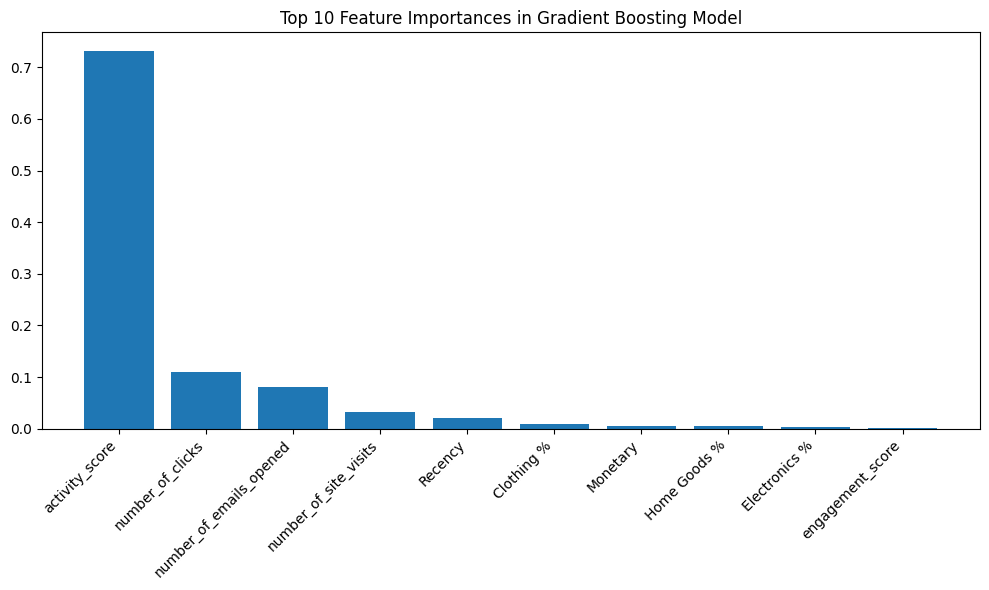

In [61]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt

# Convert join_date to datetime
df['join_date'] = pd.to_datetime(df['join_date'])

# Filter out customers who joined in 2024
df = df[df['join_date'].dt.year < 2024]

# Feature Engineering
def feature_engineering(df):
    df = df.copy()
    df['engagement_score'] = df['responded_to_Buy_One_Get_One'] + df['responded_to_Discount'] + df['responded_to_Free_Shipping']
    df['activity_score'] = df['number_of_site_visits'] + df['number_of_emails_opened'] + df['number_of_clicks']
    df['product_diversity'] = df[['Clothing %', 'Electronics %', 'Home Goods %']].nunique(axis=1)
    df['age_group'] = pd.cut(df['age'], 
                             bins=[0, 18, 25, 35, 45, 55, 65, np.inf], 
                             labels=['<18', '18-25', '26-35', '36-45', '46-55', '56-65', '65+'])
    return df

# Apply feature engineering
df = feature_engineering(df)

# Select features for the model, excluding Frequency and avg_transaction_value
features = ['activity_score', 'number_of_site_visits', 
            'number_of_emails_opened', 'number_of_clicks', 'Recency', 'Monetary', 
            'total_transactions', 'Clothing %', 
            'Electronics %', 'Home Goods %', 'engagement_score', 
            'product_diversity', 'age_group']  

# Target variable
target = 'customer_life_months'

# Prepare the data
X = df[features]
y = df[target]

# Remove rows with infinite or extremely large values
X = X.replace([np.inf, -np.inf], np.nan)
mask = ~(X.isna().any(axis=1) | y.isna() | np.isinf(y) | (np.abs(y) > 1e300))
X = X[mask]
y = y[mask]

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=42)

# Define the column transformer with OneHotEncoder and SimpleImputer
numeric_features = X.select_dtypes(include=['number']).columns
categorical_features = X.select_dtypes(exclude=['number']).columns

preprocessor = ColumnTransformer(
    transformers=[
        ('num', SimpleImputer(strategy='mean'), numeric_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ])

# Fit the preprocessor
X_train_preprocessed = preprocessor.fit_transform(X_train)

# Get feature names
onehot_encoder = preprocessor.named_transformers_['cat']
onehot_columns = onehot_encoder.get_feature_names_out(categorical_features)
feature_names = np.concatenate([numeric_features, onehot_columns])

# Fit the scaler and model
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_preprocessed)
model = GradientBoostingRegressor(n_estimators=300, max_depth=3, learning_rate=0.1, random_state=42)
model.fit(X_train_scaled, y_train)

# Calculate metrics
def calculate_metrics(X, y, dataset_name):
    X_preprocessed = preprocessor.transform(X)
    X_scaled = scaler.transform(X_preprocessed)
    y_pred = model.predict(X_scaled)
    mse = mean_squared_error(y, y_pred)
    r2 = r2_score(y, y_pred)
    print(f"{dataset_name} MSE: {mse:.4f}")
    print(f"{dataset_name} R2: {r2:.4f}")

calculate_metrics(X_train, y_train, "Train")
calculate_metrics(X_val, y_val, "Validation")
calculate_metrics(X_test, y_test, "Test")

# Get feature importances
feature_importance_df = pd.DataFrame({'feature': feature_names, 'importance': model.feature_importances_})
feature_importance_df = feature_importance_df.sort_values('importance', ascending=False).reset_index(drop=True)

# Print top 10 features
print("\nTop 10 Features:")
print(feature_importance_df.head(10))

# Plot feature importances
plt.figure(figsize=(10, 6))
plt.bar(feature_importance_df['feature'][:10], feature_importance_df['importance'][:10])
plt.title('Top 10 Feature Importances in Gradient Boosting Model')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

Part V: Trying Other Models & Attempting to Improve Accuracy

In [62]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt

# Convert join_date to datetime
df['join_date'] = pd.to_datetime(df['join_date'])

# Filter out customers who joined before March 2024 instead of before 2024
df = df[df['join_date'] < '2024-03-01']

# Feature Engineering
def feature_engineering(df):
    df['engagement_score'] = df['responded_to_Buy_One_Get_One'] + df['responded_to_Discount'] + df['responded_to_Free_Shipping']
    df['product_diversity'] = df[['Clothing %', 'Electronics %', 'Home Goods %']].nunique(axis=1)
    df['activity_score'] = df['number_of_site_visits'] + df['number_of_emails_opened'] + df['number_of_clicks']
    return df

# Apply feature engineering
df = feature_engineering(df)

# Select features for the model, excluding Frequency and avg_transaction_value
features = ['gender', 'number_of_site_visits', 'number_of_emails_opened', 'number_of_clicks',  
            'total_transactions', 'Clothing %', 'Recency', 'Monetary',
            'Electronics %', 'Home Goods %', 'engagement_score', 
            'product_diversity', 'activity_score']

# Prepare the data
X = df[features]
y = df['customer_life_months']

# Convert categorical variables to numeric
X = pd.get_dummies(X, columns=['gender'])

# Handle infinite values
X = X.replace([np.inf, -np.inf], np.nan)

# Identify non-numeric columns
non_numeric_columns = X.select_dtypes(exclude=[np.number]).columns

# Convert non-numeric columns to numeric, if any
if len(non_numeric_columns) > 0:
    for column in non_numeric_columns:
        X[column] = pd.factorize(X[column])[0]

# Identify numeric columns
numeric_columns = X.select_dtypes(include=[np.number]).columns

# Impute missing values only for numeric columns
imputer = SimpleImputer(strategy='mean')
X[numeric_columns] = imputer.fit_transform(X[numeric_columns])

# Ensure all columns are numeric before scaling
X = X.astype(float)

# First, split off the test set
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Then split the remaining data into train and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.25, random_state=42)

# Create a dataset_type column
df['dataset_type'] = 'Train'
df.loc[y_val.index, 'dataset_type'] = 'Validation'
df.loc[y_test.index, 'dataset_type'] = 'Test'

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

# Function to clip predictions to have a minimum value of 1
def clip_predictions(predictions, min_value=1):
    return np.clip(predictions, min_value, None)

# Function to train and evaluate a model
def train_and_evaluate_model(model, name):
    model.fit(X_train_scaled, y_train)
    
    val_predictions = clip_predictions(model.predict(X_val_scaled))
    test_predictions = clip_predictions(model.predict(X_test_scaled))
    
    # Make predictions for all data points
    X_all_scaled = scaler.transform(X)
    all_predictions = clip_predictions(model.predict(X_all_scaled))
    
    # Add predictions to the dataframe
    df[f'prediction_{name}'] = all_predictions
    
    test_mse = mean_squared_error(y_test, test_predictions)
    test_r2 = r2_score(y_test, test_predictions)
    val_mse = mean_squared_error(y_val, val_predictions)
    val_r2 = r2_score(y_val, val_predictions)
    
    print(f"{name} Results:")
    print(f"Test MSE: {test_mse:.4f}")
    print(f"Test R2: {test_r2:.4f}")
    print(f"Validation MSE: {val_mse:.4f}")
    print(f"Validation R2: {val_r2:.4f}")
    print()

# List of models to train and evaluate
models = [
    (GradientBoostingRegressor(n_estimators=300, max_depth=3, learning_rate=0.1, random_state=42), "Gradient Boosting"),
    (RandomForestRegressor(n_estimators=100, random_state=42), "Random Forest"),
    (LinearRegression(), "Linear Regression"),
    (Ridge(alpha=1.0), "Ridge Regression"),
    (SVR(kernel='rbf', C=1.0, epsilon=0.1), "Support Vector Regression")
]

# Train and evaluate each model
for model, name in models:
    train_and_evaluate_model(model, name)

# Use the best performing model's predictions for residual analysis
best_model = "Gradient Boosting"
df['prediction'] = df[f'prediction_{best_model}']

Gradient Boosting Results:
Test MSE: 21.5816
Test R2: 0.8375
Validation MSE: 24.5840
Validation R2: 0.8318

Random Forest Results:
Test MSE: 22.5250
Test R2: 0.8304
Validation MSE: 24.3134
Validation R2: 0.8336

Linear Regression Results:
Test MSE: 31.3386
Test R2: 0.7641
Validation MSE: 34.7673
Validation R2: 0.7621

Ridge Regression Results:
Test MSE: 31.3396
Test R2: 0.7641
Validation MSE: 34.7346
Validation R2: 0.7623

Support Vector Regression Results:
Test MSE: 26.8390
Test R2: 0.7979
Validation MSE: 32.2762
Validation R2: 0.7791



Part VI: Residual Analysis

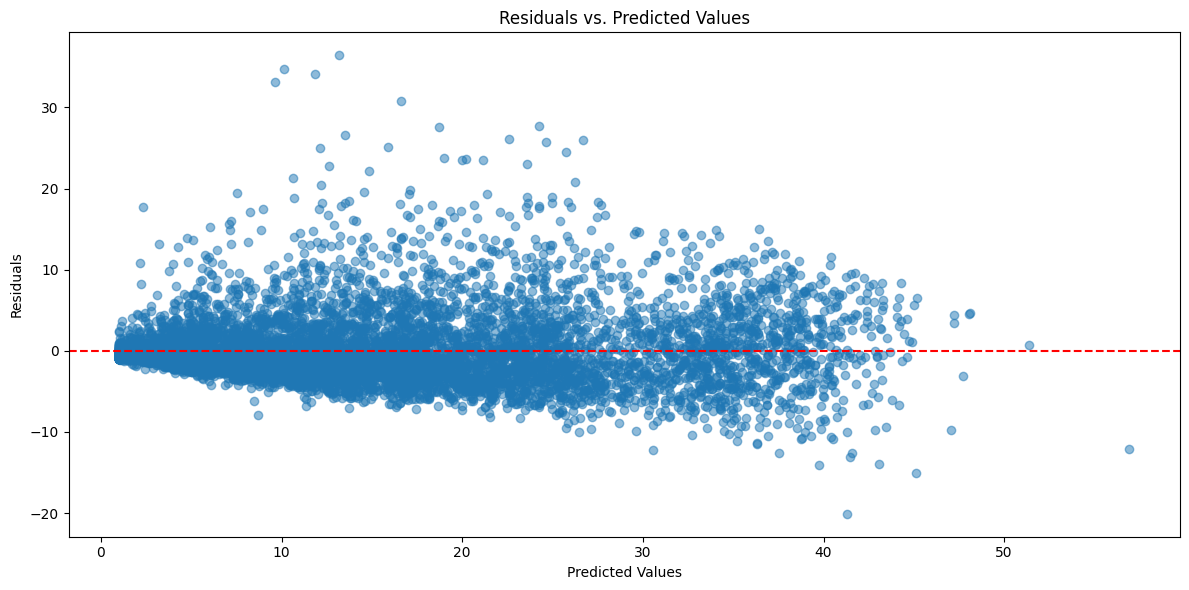

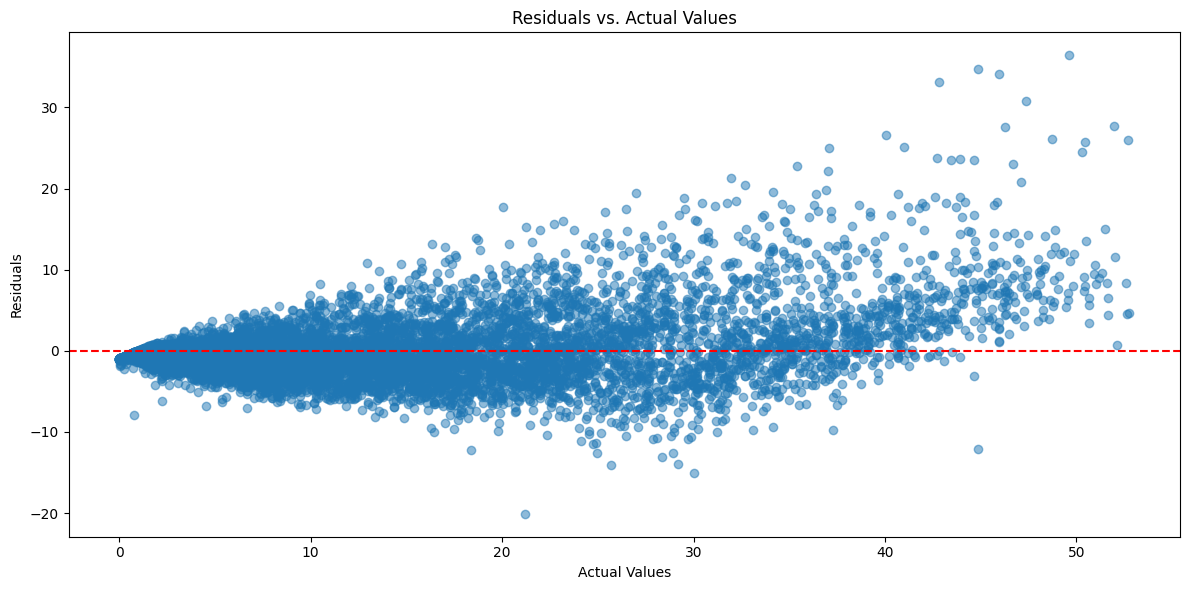

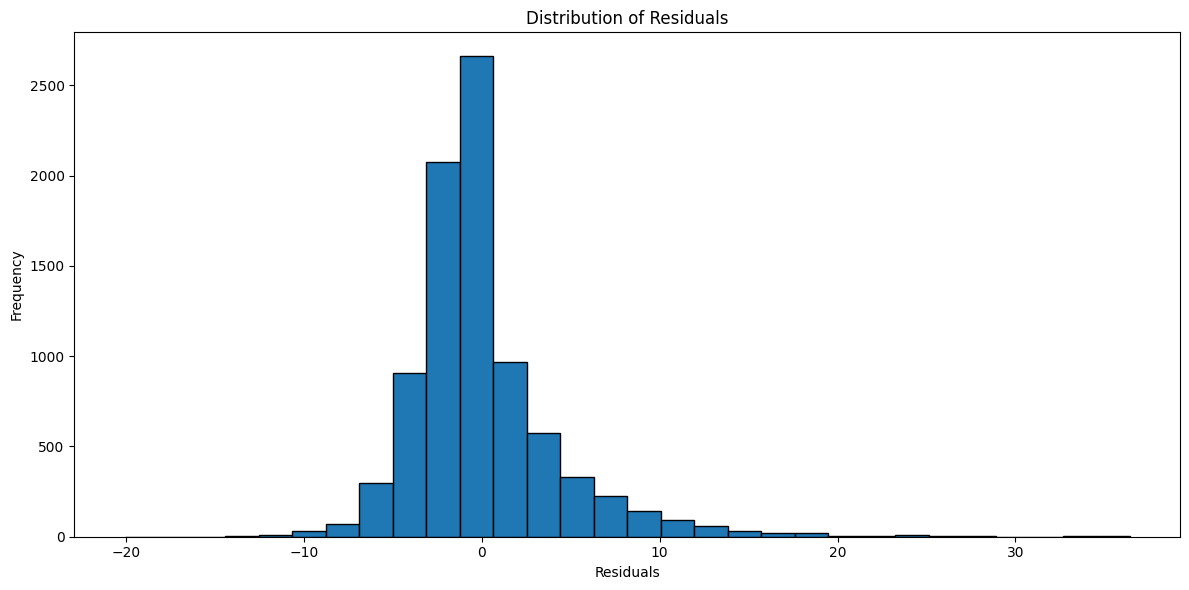

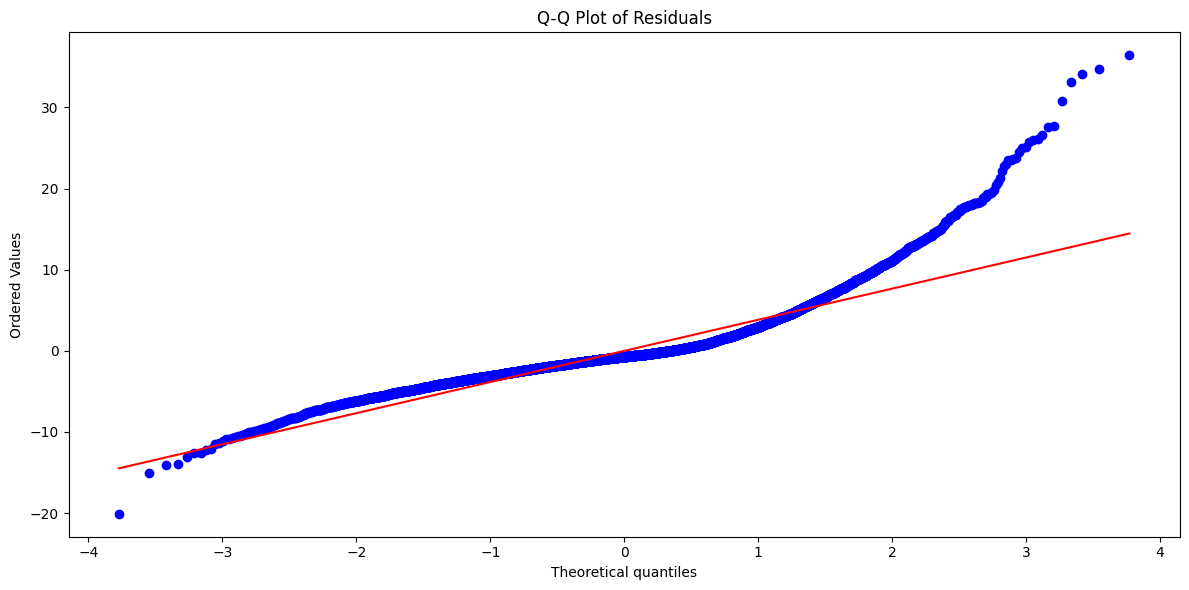

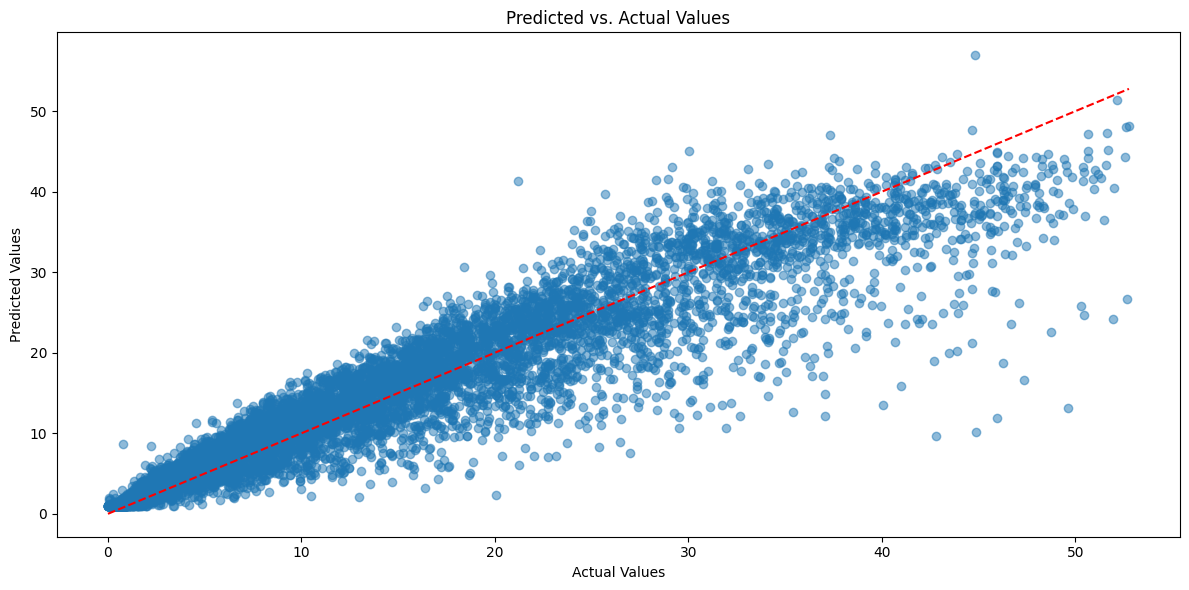

Residuals Summary Statistics:
count    8557.000000
mean       -0.009036
std         4.123836
min       -20.088928
25%        -2.222816
50%        -0.733333
75%         1.170890
max        36.430608
Name: residuals, dtype: float64


In [63]:
# Calculate residuals
df['residuals'] = df['customer_life_months'] - df['prediction']

# Plot the residuals vs. predicted values
plt.figure(figsize=(12, 6))
plt.scatter(df['prediction'], df['residuals'], alpha=0.5)
plt.axhline(y=0, color='r', linestyle='--')
plt.title('Residuals vs. Predicted Values')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.tight_layout()
plt.show()

# Plot the residuals vs. actual values
plt.figure(figsize=(12, 6))
plt.scatter(df['customer_life_months'], df['residuals'], alpha=0.5)
plt.axhline(y=0, color='r', linestyle='--')
plt.title('Residuals vs. Actual Values')
plt.xlabel('Actual Values')
plt.ylabel('Residuals')
plt.tight_layout()
plt.show()

# Plot the residuals distribution
plt.figure(figsize=(12, 6))
plt.hist(df['residuals'], bins=30, edgecolor='k')
plt.title('Distribution of Residuals')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

# Q-Q plot of residuals
import scipy.stats as stats
plt.figure(figsize=(12, 6))
stats.probplot(df['residuals'], dist="norm", plot=plt)
plt.title('Q-Q Plot of Residuals')
plt.tight_layout()
plt.show()

# Plot predicted vs. actual values
plt.figure(figsize=(12, 6))
plt.scatter(df['customer_life_months'], df['prediction'], alpha=0.5)
plt.plot([df['customer_life_months'].min(), df['customer_life_months'].max()], 
         [df['customer_life_months'].min(), df['customer_life_months'].max()], 
         color='red', linestyle='--')
plt.title('Predicted vs. Actual Values')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.tight_layout()
plt.show()

# Residuals summary statistics
residuals_summary = df['residuals'].describe()
print("Residuals Summary Statistics:")
print(residuals_summary)

Part VII: Calculating Predicted CLV

In [64]:
import pandas as pd
from sklearn.impute import SimpleImputer
import numpy as np

# Print max, min, average, and median of the prediction column
max_prediction = df['prediction'].max()
min_prediction = df['prediction'].min()
avg_prediction = df['prediction'].mean()
med_prediction = df['prediction'].median()

print(f"Max Prediction (Months): {max_prediction:.2f}")
print(f"Min Prediction (Months): {min_prediction:.2f}")
print(f"Average Prediction (Months): {avg_prediction:.2f}")
print(f"Median Prediction (Months): {med_prediction:.2f}")

# Handle infinite values in the monthly_spend column
df['monthly_spend'] = df['monthly_spend'].replace([np.inf, -np.inf], np.nan)

# Impute missing values in the monthly_spend column
imputer = SimpleImputer(strategy='median')
df['monthly_spend'] = imputer.fit_transform(df[['monthly_spend']])

# Create Predicted CLV column
df['Predicted CLV'] = df['prediction'] * df['monthly_spend']

# Round Predicted CLV to the nearest dollar
df['Predicted CLV'] = df['Predicted CLV'].round(0)

# Print max, min, average, and median predicted CLV
max_pred_clv = df['Predicted CLV'].max()
min_pred_clv = df['Predicted CLV'].min()
avg_pred_clv = df['Predicted CLV'].mean()
med_pred_clv = df['Predicted CLV'].median()

print(f"Max Predicted CLV: ${max_pred_clv:,.0f}")
print(f"Min Predicted CLV: ${min_pred_clv:,.0f}")
print(f"Average Predicted CLV: ${avg_pred_clv:,.0f}")
print(f"Median Predicted CLV: ${med_pred_clv:,.0f}")

Max Prediction (Months): 56.94
Min Prediction (Months): 1.00
Average Prediction (Months): 14.72
Median Prediction (Months): 12.22
Max Predicted CLV: $59,923
Min Predicted CLV: $18
Average Predicted CLV: $8,410
Median Predicted CLV: $7,574


Part VIII: Ensemble Model (Using Gradient Boost + Wide & Deep Neural Network)

Epoch 1/200
86/86 [==============================] - 2s 8ms/step - loss: 59.2352 - val_loss: 129.7069 - lr: 0.0010
Epoch 2/200
86/86 [==============================] - 1s 7ms/step - loss: 29.6928 - val_loss: 64.6413 - lr: 0.0010
Epoch 3/200
86/86 [==============================] - 1s 7ms/step - loss: 27.4594 - val_loss: 44.9040 - lr: 0.0010
Epoch 4/200
86/86 [==============================] - 1s 6ms/step - loss: 28.3207 - val_loss: 36.0345 - lr: 0.0010
Epoch 5/200
86/86 [==============================] - 1s 6ms/step - loss: 27.2148 - val_loss: 26.6727 - lr: 0.0010
Epoch 6/200
86/86 [==============================] - 1s 6ms/step - loss: 26.0214 - val_loss: 24.4934 - lr: 0.0010
Epoch 7/200
86/86 [==============================] - 1s 6ms/step - loss: 26.3765 - val_loss: 22.4389 - lr: 0.0010
Epoch 8/200
86/86 [==============================] - 1s 7ms/step - loss: 26.5572 - val_loss: 22.8306 - lr: 0.0010
Epoch 9/200
86/86 [==============================] - 1s 7ms/step - loss: 24.7131 - val_

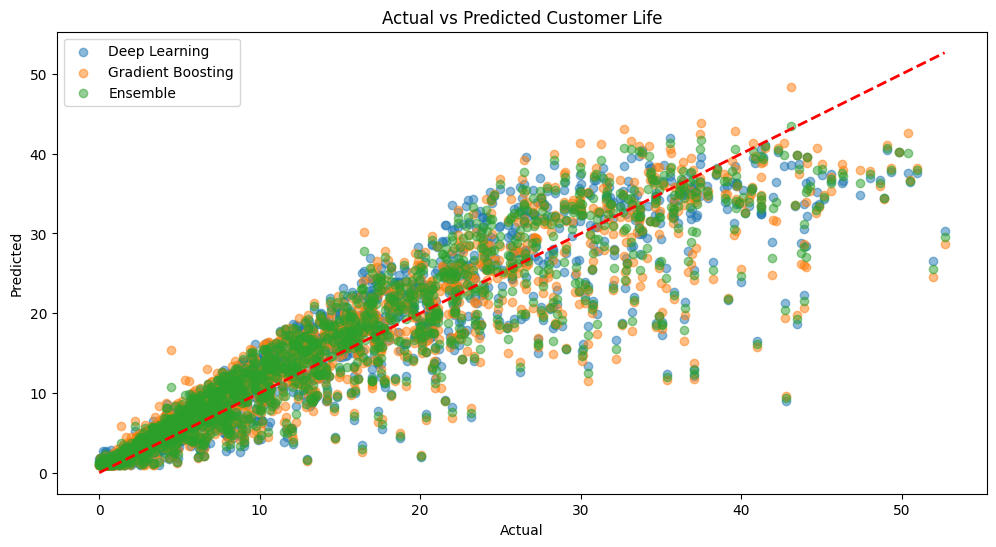

In [65]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.impute import SimpleImputer
from sklearn.ensemble import GradientBoostingRegressor
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, BatchNormalization, Dropout, LeakyReLU, Add, Concatenate
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping

# Select features for the model
features = ['gender', 'number_of_site_visits', 'number_of_emails_opened', 'number_of_clicks',  
            'total_transactions', 'Clothing %', 'Recency', 'Monetary',
            'Electronics %', 'Home Goods %', 'engagement_score', 
            'product_diversity', 'activity_score']

X = df[features]
y = df['customer_life_months']

# Handle categorical variables
X = pd.get_dummies(X, columns=['gender'])

# Split the data
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

def create_advanced_model(input_dim):
    inputs = Input(shape=(input_dim,))
    
    # Wide branch
    wide = Dense(256)(inputs)
    wide = BatchNormalization()(wide)
    wide = LeakyReLU()(wide)
    wide = Dropout(0.3)(wide)
    
    # Deep branch
    x = Dense(128)(inputs)
    x = BatchNormalization()(x)
    x = LeakyReLU()(x)
    x = Dropout(0.3)(x)
    
    # Residual blocks
    for _ in range(3):
        residual = x
        x = Dense(128)(x)
        x = BatchNormalization()(x)
        x = LeakyReLU()(x)
        x = Dropout(0.3)(x)
        x = Dense(128)(x)
        x = BatchNormalization()(x)
        x = LeakyReLU()(x)
        x = Add()([x, residual])
    
    # Combine wide and deep
    combined = Concatenate()([wide, x])
    
    # Output layer
    output = Dense(64, activation='relu')(combined)
    output = Dense(1)(output)
    
    model = Model(inputs=inputs, outputs=output)
    
    optimizer = Adam(learning_rate=0.001)
    model.compile(optimizer=optimizer, loss='mse')
    
    return model

# Create and train the advanced deep learning model
dl_model = create_advanced_model(X_train_scaled.shape[1])

# Callbacks
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=0.00001)
early_stopping = EarlyStopping(monitor='val_loss', patience=20, restore_best_weights=True)

history = dl_model.fit(
    X_train_scaled, y_train,
    validation_data=(X_val_scaled, y_val),
    epochs=200,
    batch_size=64,
    callbacks=[reduce_lr, early_stopping],
    verbose=1
)

# Train Gradient Boosting model
gb_model = GradientBoostingRegressor(n_estimators=300, max_depth=3, learning_rate=0.1, random_state=42)
gb_model.fit(X_train_scaled, y_train)

# Function to clip predictions to have a minimum value of 1
def clip_predictions(predictions, min_value=1):
    return np.clip(predictions, min_value, None)

# Make predictions using both models
dl_predictions = clip_predictions(dl_model.predict(X_test_scaled).flatten())
gb_predictions = clip_predictions(gb_model.predict(X_test_scaled))

# Create ensemble predictions (simple average)
ensemble_predictions = (dl_predictions + gb_predictions) / 2

# Calculate metrics for all models
def calculate_metrics(y_true, y_pred):
    mse = mean_squared_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    return mse, r2

dl_mse, dl_r2 = calculate_metrics(y_test, dl_predictions)
gb_mse, gb_r2 = calculate_metrics(y_test, gb_predictions)
ensemble_mse, ensemble_r2 = calculate_metrics(y_test, ensemble_predictions)

print("Advanced Deep Learning Model Results:")
print(f"MSE: {dl_mse:.4f}")
print(f"R2: {dl_r2:.4f}")

print("\nGradient Boosting Model Results:")
print(f"MSE: {gb_mse:.4f}")
print(f"R2: {gb_r2:.4f}")

print("\nEnsemble Model Results:")
print(f"MSE: {ensemble_mse:.4f}")
print(f"R2: {ensemble_r2:.4f}")

# Visualize predictions
plt.figure(figsize=(12, 6))
plt.scatter(y_test, dl_predictions, alpha=0.5, label='Deep Learning')
plt.scatter(y_test, gb_predictions, alpha=0.5, label='Gradient Boosting')
plt.scatter(y_test, ensemble_predictions, alpha=0.5, label='Ensemble')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted Customer Life')
plt.legend()
plt.show()

Part IX: Hyperparameter Tuning

Reloading Tuner from keras_tuner\customer_life_prediction\tuner0.json


Epoch 1/200
86/86 [==============================] - 1s 8ms/step - loss: 22.9792 - val_loss: 21.7522 - lr: 0.0023
Epoch 2/200
86/86 [==============================] - 0s 6ms/step - loss: 22.9818 - val_loss: 22.7806 - lr: 0.0023
Epoch 3/200
86/86 [==============================] - 0s 5ms/step - loss: 23.0939 - val_loss: 21.8892 - lr: 0.0023
Epoch 4/200
86/86 [==============================] - 0s 5ms/step - loss: 22.5249 - val_loss: 22.2662 - lr: 0.0023
Epoch 5/200
86/86 [==============================] - 0s 5ms/step - loss: 22.2357 - val_loss: 22.2163 - lr: 0.0023
Epoch 6/200
86/86 [==============================] - 0s 5ms/step - loss: 22.8565 - val_loss: 21.9960 - lr: 0.0023
Epoch 7/200
86/86 [==============================] - 0s 5ms/step - loss: 22.1161 - val_loss: 21.7701 - lr: 4.6030e-04
Epoch 8/200
86/86 [==============================] - 0s 5ms/step - loss: 21.6876 - val_loss: 21.9418 - lr: 4.6030e-04
Epoch 9/200
86/86 [==============================] - 0s 5ms/step - loss: 21.7135

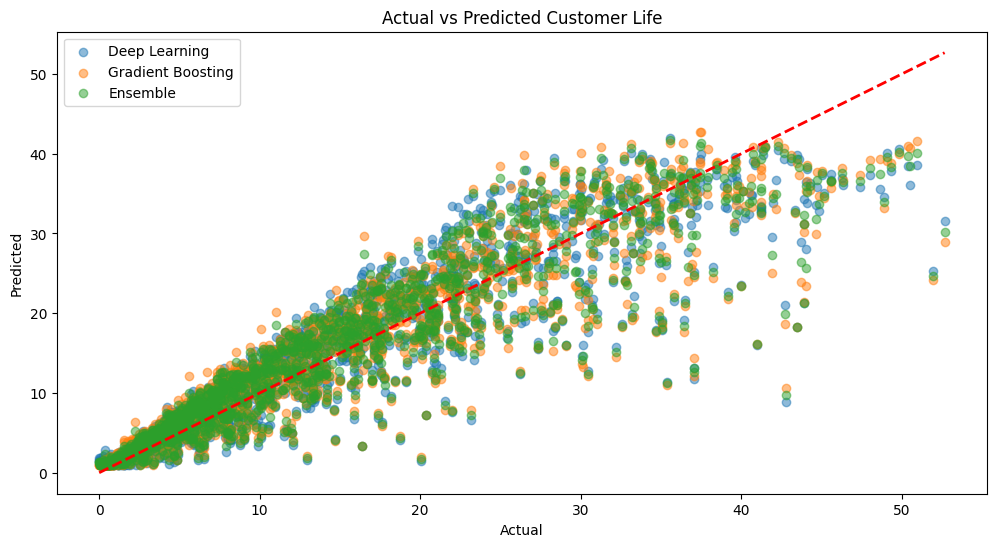

In [66]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.impute import SimpleImputer
from sklearn.ensemble import GradientBoostingRegressor
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, BatchNormalization, Dropout, LeakyReLU, Add, Concatenate
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping
import keras_tuner as kt

# Select features for the model
features = ['gender', 'number_of_site_visits', 'number_of_emails_opened', 'number_of_clicks',  
            'total_transactions', 'Clothing %', 'Recency', 'Monetary',
            'Electronics %', 'Home Goods %', 'engagement_score', 
            'product_diversity', 'activity_score']

X = df[features]
y = df['customer_life_months']

# Handle categorical variables
X = pd.get_dummies(X, columns=['gender'])

# Split the data
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

def create_advanced_model(hp):
    inputs = Input(shape=(X_train_scaled.shape[1],))
    
    # Wide branch
    wide = Dense(hp.Int('wide_units', min_value=64, max_value=256, step=64))(inputs)
    wide = BatchNormalization()(wide)
    wide = LeakyReLU()(wide)
    wide = Dropout(hp.Float('wide_dropout', min_value=0.1, max_value=0.5, step=0.1))(wide)
    
    # Deep branch
    x = Dense(hp.Int('deep_units', min_value=64, max_value=256, step=64))(inputs)
    x = BatchNormalization()(x)
    x = LeakyReLU()(x)
    x = Dropout(hp.Float('deep_dropout', min_value=0.1, max_value=0.5, step=0.1))(x)
    
    # Residual blocks
    for _ in range(hp.Int('num_residual_blocks', 1, 3)):
        residual = x
        units = hp.Int('residual_units', min_value=64, max_value=256, step=64)
        x = Dense(units)(x)
        x = BatchNormalization()(x)
        x = LeakyReLU()(x)
        x = Dropout(hp.Float('residual_dropout', min_value=0.1, max_value=0.5, step=0.1))(x)
        x = Dense(units)(x)
        x = BatchNormalization()(x)
        x = LeakyReLU()(x)
        x = Add()([x, residual])
    
    # Combine wide and deep
    combined = Concatenate()([wide, x])
    
    # Output layer
    output = Dense(hp.Int('output_units', min_value=32, max_value=128, step=32), activation='relu')(combined)
    output = Dense(1)(output)
    
    model = Model(inputs=inputs, outputs=output)
    
    optimizer = Adam(learning_rate=hp.Float('learning_rate', min_value=1e-4, max_value=1e-2, sampling='log'))
    model.compile(optimizer=optimizer, loss='mse')
    
    return model

# Hyperparameter tuning for deep learning model
tuner = kt.RandomSearch(
    create_advanced_model,
    objective='val_loss',
    max_trials=10,
    executions_per_trial=1,
    directory='keras_tuner',
    project_name='customer_life_prediction',
    max_consecutive_failed_trials=5
)

tuner.search(
    X_train_scaled, y_train,
    validation_data=(X_val_scaled, y_val),
    epochs=50,
    callbacks=[EarlyStopping(patience=10, restore_best_weights=True)]
)

# Get the best model
best_dl_model = tuner.get_best_models(num_models=1)[0]

# Train the best model
history = best_dl_model.fit(
    X_train_scaled, y_train,
    validation_data=(X_val_scaled, y_val),
    epochs=200,
    batch_size=64,
    callbacks=[
        ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=0.00001),
        EarlyStopping(monitor='val_loss', patience=20, restore_best_weights=True)
    ],
    verbose=1
)

# Hyperparameter tuning for Gradient Boosting model
param_dist = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 4, 5],
    'learning_rate': [0.01, 0.1, 0.2],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

gb_model = GradientBoostingRegressor(random_state=42)
random_search = RandomizedSearchCV(
    gb_model, param_distributions=param_dist, 
    n_iter=10, cv=3, random_state=42, n_jobs=-1
)
random_search.fit(X_train_scaled, y_train)

best_gb_model = random_search.best_estimator_

# Function to clip predictions to have a minimum value of 1
def clip_predictions(predictions, min_value=1):
    return np.clip(predictions, min_value, None)

# Make predictions using both models
dl_predictions = clip_predictions(best_dl_model.predict(X_test_scaled).flatten())
gb_predictions = clip_predictions(best_gb_model.predict(X_test_scaled))

# Create ensemble predictions (simple average)
ensemble_predictions = (dl_predictions + gb_predictions) / 2

# Calculate metrics for all models
def calculate_metrics(y_true, y_pred):
    mse = mean_squared_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    return mse, r2

dl_mse, dl_r2 = calculate_metrics(y_test, dl_predictions)
gb_mse, gb_r2 = calculate_metrics(y_test, gb_predictions)
ensemble_mse, ensemble_r2 = calculate_metrics(y_test, ensemble_predictions)

print("Advanced Deep Learning Model Results:")
print(f"MSE: {dl_mse:.4f}")
print(f"R2: {dl_r2:.4f}")

print("\nGradient Boosting Model Results:")
print(f"MSE: {gb_mse:.4f}")
print(f"R2: {gb_r2:.4f}")

print("\nEnsemble Model Results:")
print(f"MSE: {ensemble_mse:.4f}")
print(f"R2: {ensemble_r2:.4f}")

# Visualize predictions
plt.figure(figsize=(12, 6))
plt.scatter(y_test, dl_predictions, alpha=0.5, label='Deep Learning')
plt.scatter(y_test, gb_predictions, alpha=0.5, label='Gradient Boosting')
plt.scatter(y_test, ensemble_predictions, alpha=0.5, label='Ensemble')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted Customer Life')
plt.legend()
plt.show()

Part X: Final Predicted CLV Calculation

In [67]:
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer

# Add predictions to the original dataframe
df.loc[X_test.index, 'prediction'] = ensemble_predictions

# Print max, min, average, and median of the prediction column
max_prediction = df['prediction'].max()
min_prediction = df['prediction'].min()
avg_prediction = df['prediction'].mean()
med_prediction = df['prediction'].median()

print(f"Max Prediction (Months): {max_prediction:.2f}")
print(f"Min Prediction (Months): {min_prediction:.2f}")
print(f"Average Prediction (Months): {avg_prediction:.2f}")
print(f"Median Prediction (Months): {med_prediction:.2f}")

# Calculate monthly spend
df['monthly_spend'] = df['Monetary'] / df['customer_life_months']

# Handle infinite values in the monthly_spend column
df['monthly_spend'] = df['monthly_spend'].replace([np.inf, -np.inf], np.nan)

# Impute missing values in the monthly_spend column
imputer = SimpleImputer(strategy='median')
df['monthly_spend'] = imputer.fit_transform(df[['monthly_spend']])

# Create Predicted CLV column
df['Predicted CLV'] = df['prediction'] * df['monthly_spend']

# Round Predicted CLV to the nearest dollar
df['Predicted CLV'] = df['Predicted CLV'].round(0)

# Print max, min, average, and median predicted CLV
max_pred_clv = df['Predicted CLV'].max()
min_pred_clv = df['Predicted CLV'].min()
avg_pred_clv = df['Predicted CLV'].mean()
med_pred_clv = df['Predicted CLV'].median()

print(f"Max Predicted CLV: ${max_pred_clv:,.0f}")
print(f"Min Predicted CLV: ${min_pred_clv:,.0f}")
print(f"Average Predicted CLV: ${avg_pred_clv:,.0f}")
print(f"Median Predicted CLV: ${med_pred_clv:,.0f}")

Max Prediction (Months): 56.94
Min Prediction (Months): 1.00
Average Prediction (Months): 14.71
Median Prediction (Months): 12.22
Max Predicted CLV: $482,943
Min Predicted CLV: $17
Average Predicted CLV: $9,377
Median Predicted CLV: $7,724


Part XI: Final Residual Analysis

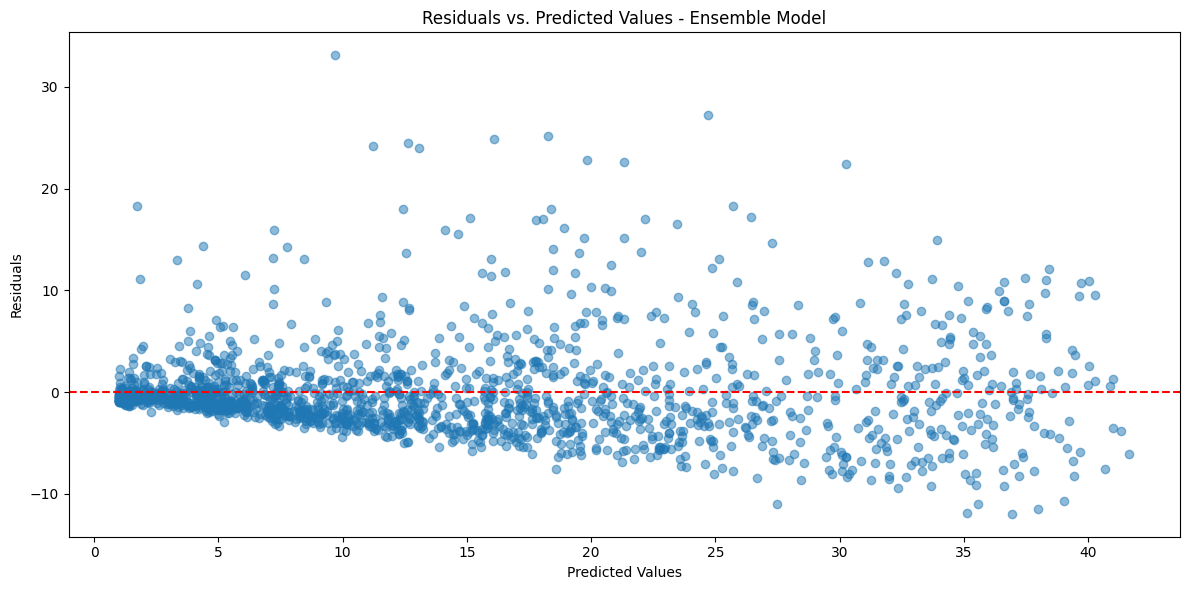

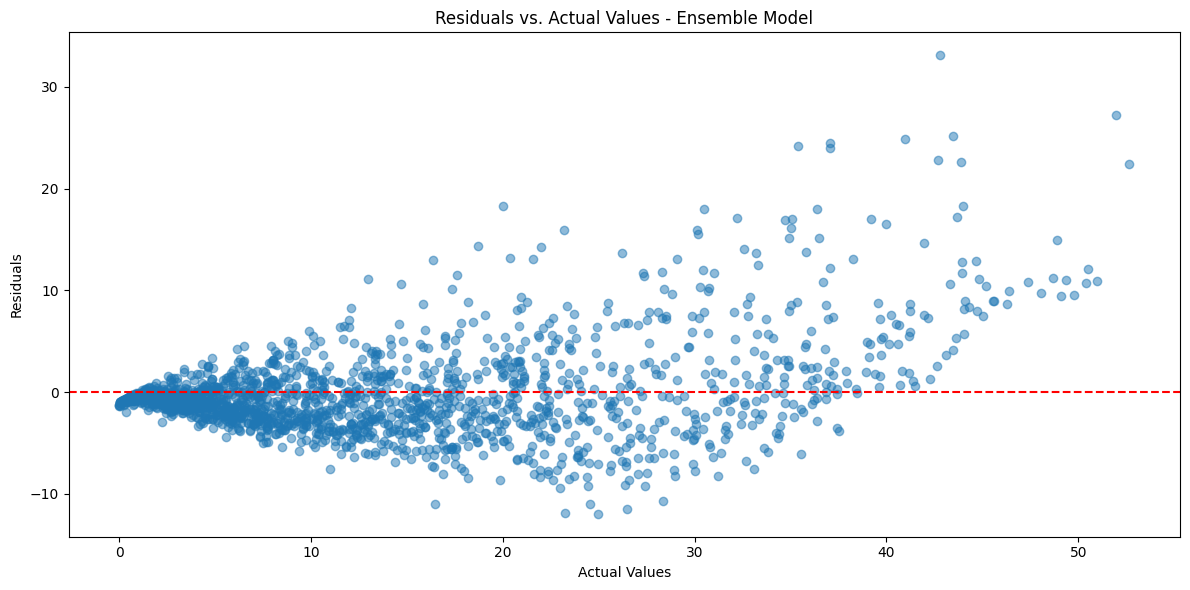

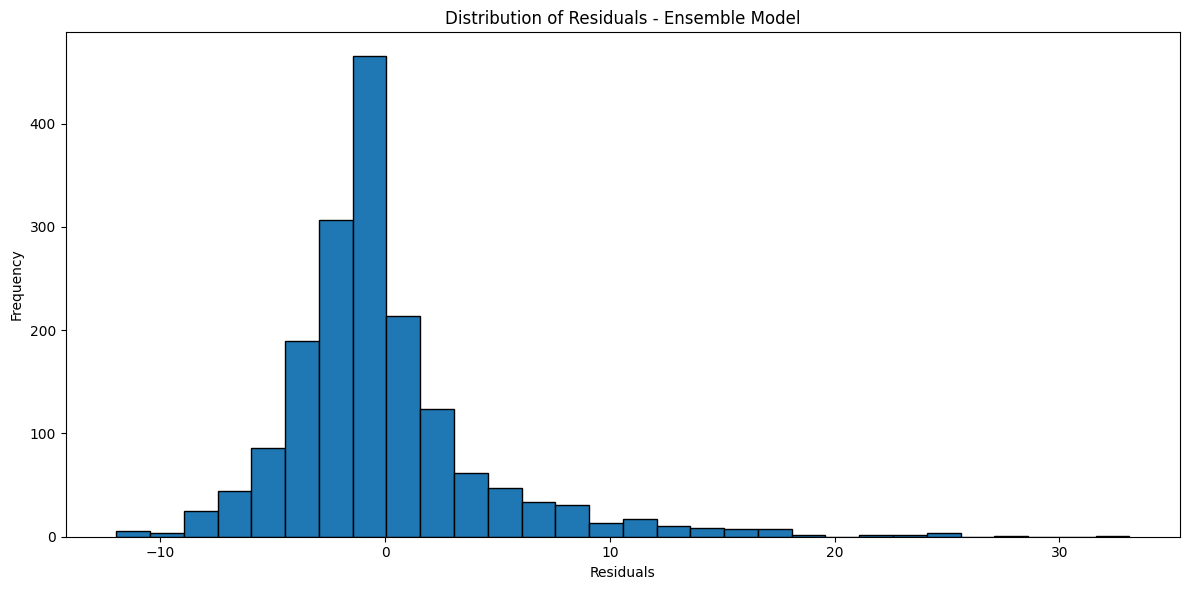

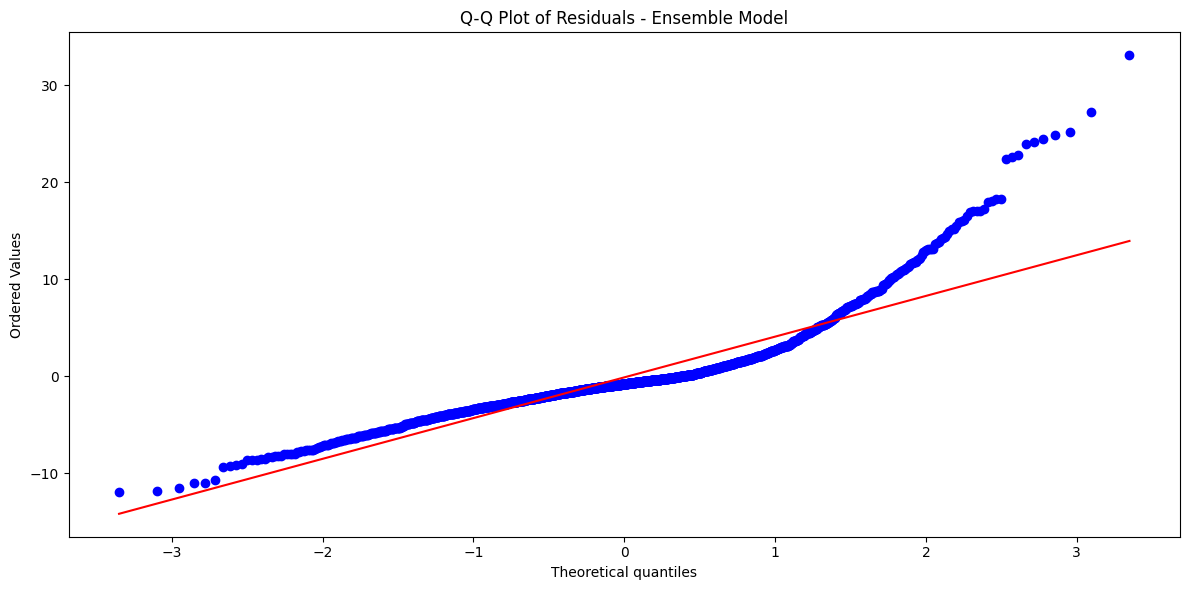

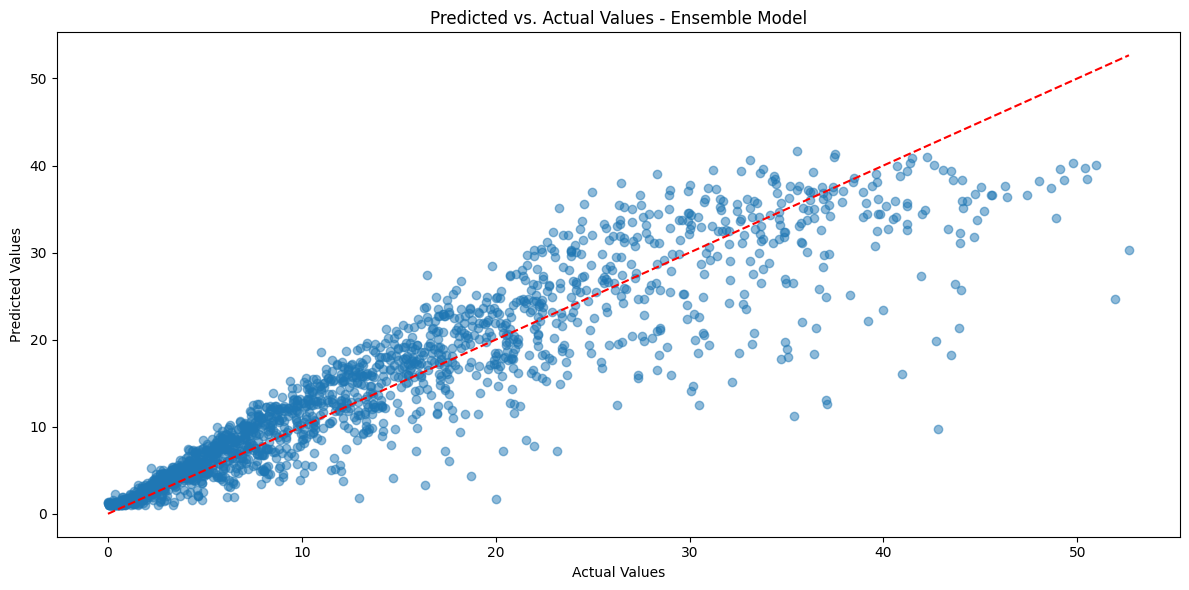

Residuals Summary Statistics - Ensemble Model:
count    1712.000000
mean       -0.119503
std         4.548308
min       -11.960470
25%        -2.535149
50%        -0.801627
75%         1.078568
max        33.108182
Name: residuals, dtype: float64


In [68]:
import matplotlib.pyplot as plt
import scipy.stats as stats

# Calculate residuals for the ensemble model
residuals = y_test - ensemble_predictions

# Create a dataframe with actual values, predictions, and residuals
df = pd.DataFrame({
    'customer_life_months': y_test,
    'prediction': ensemble_predictions,
    'residuals': residuals
})

# Plot the residuals vs. predicted values
plt.figure(figsize=(12, 6))
plt.scatter(df['prediction'], df['residuals'], alpha=0.5)
plt.axhline(y=0, color='r', linestyle='--')
plt.title('Residuals vs. Predicted Values - Ensemble Model')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.tight_layout()
plt.show()

# Plot the residuals vs. actual values
plt.figure(figsize=(12, 6))
plt.scatter(df['customer_life_months'], df['residuals'], alpha=0.5)
plt.axhline(y=0, color='r', linestyle='--')
plt.title('Residuals vs. Actual Values - Ensemble Model')
plt.xlabel('Actual Values')
plt.ylabel('Residuals')
plt.tight_layout()
plt.show()

# Plot the residuals distribution
plt.figure(figsize=(12, 6))
plt.hist(df['residuals'], bins=30, edgecolor='k')
plt.title('Distribution of Residuals - Ensemble Model')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

# Q-Q plot of residuals
plt.figure(figsize=(12, 6))
stats.probplot(df['residuals'], dist="norm", plot=plt)
plt.title('Q-Q Plot of Residuals - Ensemble Model')
plt.tight_layout()
plt.show()

# Plot predicted vs. actual values
plt.figure(figsize=(12, 6))
plt.scatter(df['customer_life_months'], df['prediction'], alpha=0.5)
plt.plot([df['customer_life_months'].min(), df['customer_life_months'].max()], 
         [df['customer_life_months'].min(), df['customer_life_months'].max()], 
         color='red', linestyle='--')
plt.title('Predicted vs. Actual Values - Ensemble Model')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.tight_layout()
plt.show()

# Residuals summary statistics
residuals_summary = df['residuals'].describe()
print("Residuals Summary Statistics - Ensemble Model:")
print(residuals_summary)